In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , auc , accuracy_score

import tensorflow as tf
from tensorflow import keras

from PIL import Image
import cv2
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,Conv2D, Flatten,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

import warnings
warnings.filterwarnings('ignore')

In [28]:
path = "/content/drive/MyDrive/Plant_Dataset/archive (6)/Train/Train"
train = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 1322 files belonging to 3 classes.


In [29]:
path = "/content/drive/MyDrive/Plant_Dataset/archive (6)/Test/Test"
test = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 150 files belonging to 3 classes.


In [30]:
path = "/content/drive/MyDrive/Plant_Dataset/archive (6)/Validation/Validation"
valid = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 60 files belonging to 3 classes.


In [31]:
class_labels = train.class_names
class_labels

['Healthy', 'Powdery', 'Rust']

In [32]:
print(len(train))
print(len(test))
print(len(valid))

42
5
2


## Data Preprocessing

In [33]:
for image_batch,image_label in train.take(1):
    print(image_batch[0])
    print(class_labels[image_label[0].numpy()])

tf.Tensor(
[[[108.78125  108.78125   71.40625 ]
  [109.71875  110.71875   70.71875 ]
  [109.0332   110.0332    70.0332  ]
  ...
  [126.7168   137.7168   103.7168  ]
  [127.89258  137.89258  102.89258 ]
  [116.03906  127.41406   89.72656 ]]

 [[108.05664  109.05664   67.1543  ]
  [109.625    110.625     70.3125  ]
  [107.26172  108.41797   68.57422 ]
  ...
  [121.29492  132.29492   98.29492 ]
  [127.67578  137.98828  102.83203 ]
  [113.68359  125.05859   87.68359 ]]

 [[113.28125  114.68945   69.46484 ]
  [109.57422  110.57422   68.57422 ]
  [108.583984 110.583984  71.583984]
  ...
  [122.197266 133.19727   99.197266]
  [122.03711  134.03711   98.03711 ]
  [117.89844  129.27344   93.58594 ]]

 ...

 [[ 81.93555   82.93555   64.93555 ]
  [ 81.01953   82.01953   64.01953 ]
  [ 81.365234  84.365234  65.365234]
  ...
  [152.78125  182.78125  145.44922 ]
  [168.31836  197.31836  153.31836 ]
  [175.0332   204.0332   158.0332  ]]

 [[ 77.978516  80.666016  61.822266]
  [ 74.77734   77.46484   

## Train Image Data

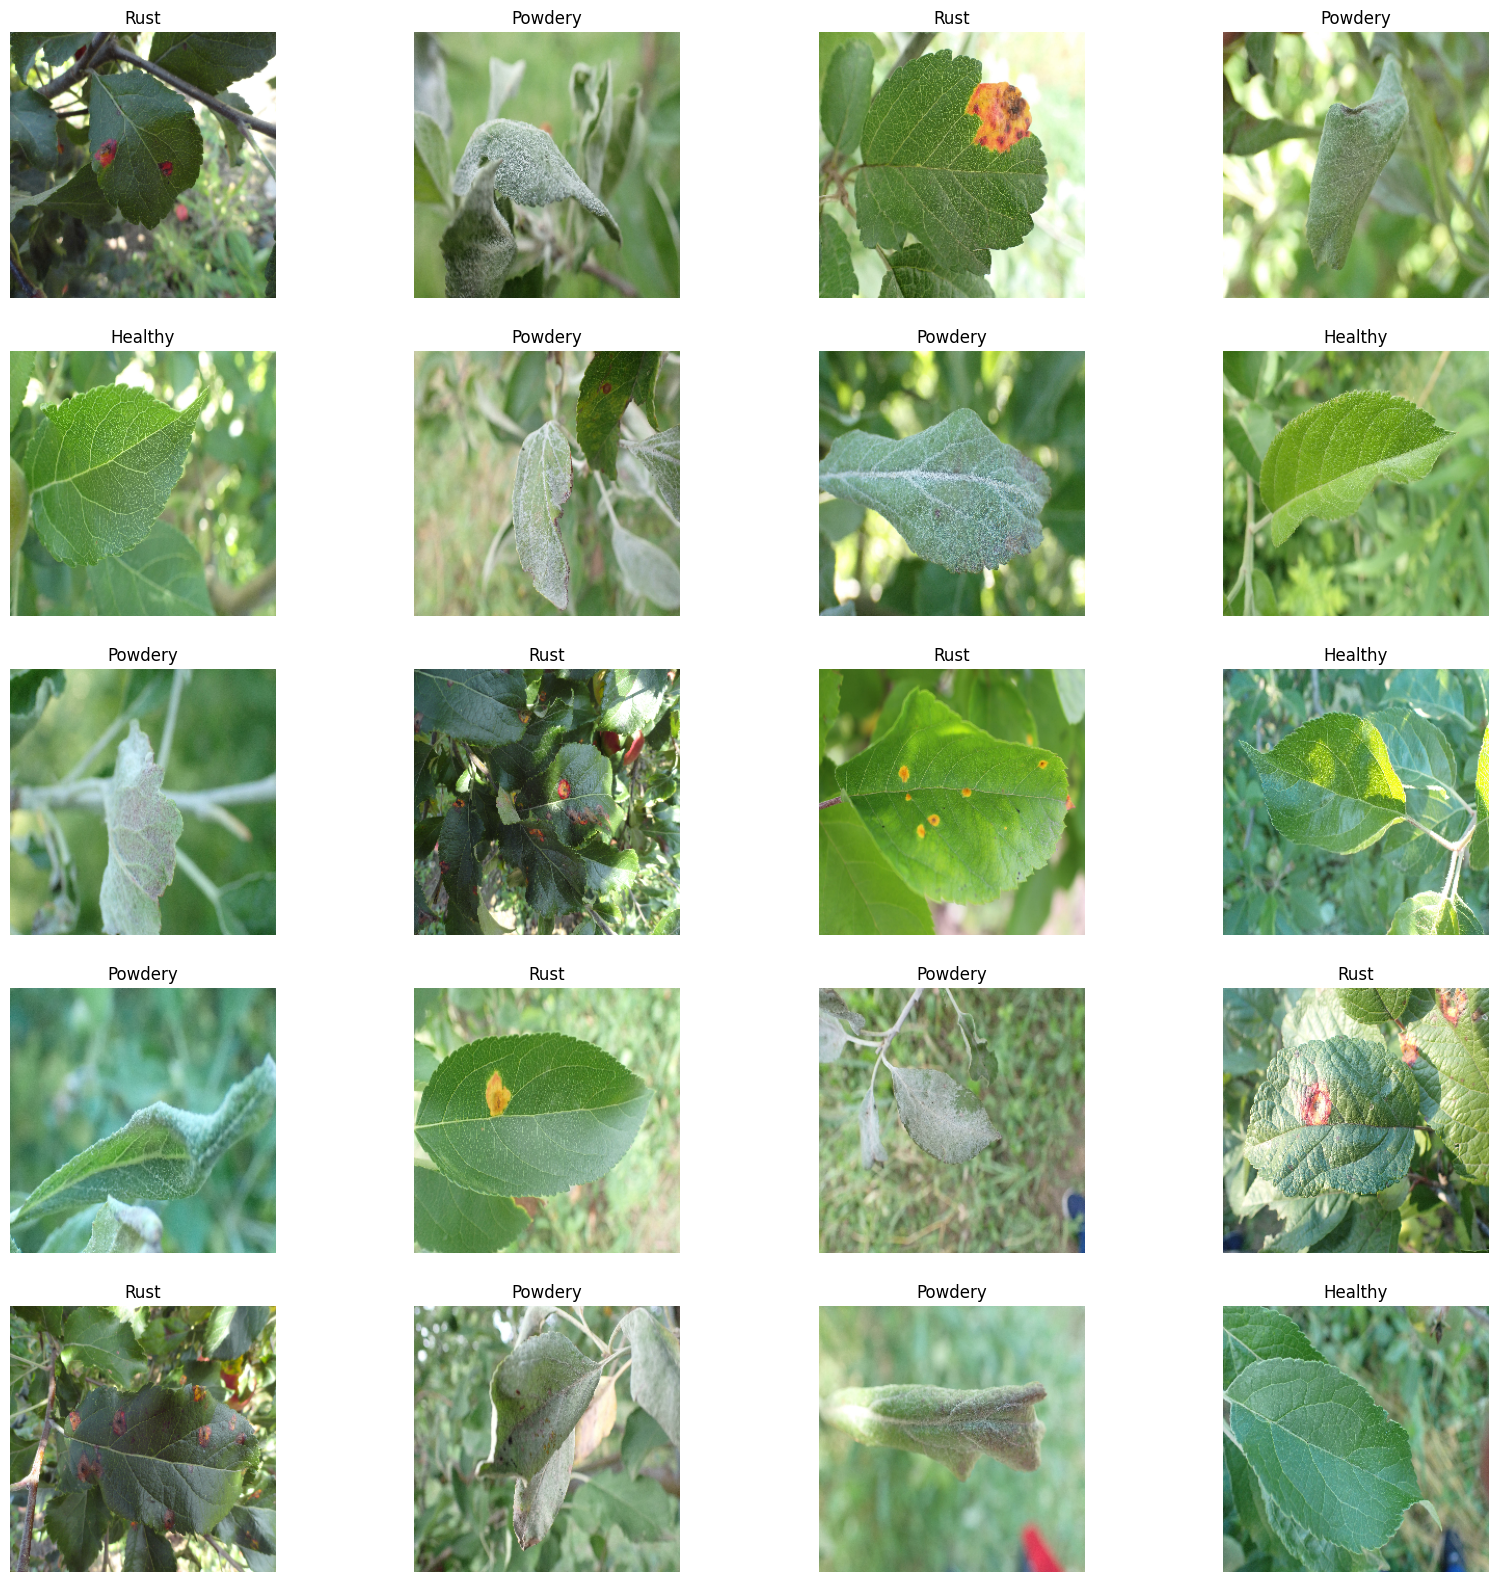

In [34]:
plt.figure(figsize=(20,20))
for image_batch , image_label in train.take(1):
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_labels[image_label[i].numpy()])
        plt.axis("off")

## Resizing and Rescaling Images

In [73]:
IMAGE_SIZE = 256
CHANNELS = 3
BATCH_SIZE = 32
EPOCHS = 10

#  Resizing و Rescaling
resizing_and_rescaling = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0 / 255)
])


In [69]:
resizing_and_rescaling = tf.keras.Sequential([
    tf.keras.layers.Resizing(256,256),
    tf.keras.layers.Rescaling(1.0/255)
])

## Data Augmentation

In [74]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.RandomRotation(0.2)
])


## Creat CNN Model

In [77]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # تحديد input_shape هنا
    resizing_and_rescaling,
    data_augmentation,
  # Convolution layer 1
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='valid',activation='relu',input_shape=input_shape),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 2
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 3
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 4
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Flatten Layers
  tf.keras.layers.Flatten(),

  # Dense layers
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units=100,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=3,activation='softmax')

])


In [78]:
model.summary()

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_49 (Sequential)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_50 (Sequential)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_92 (Conv2D)                   │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_92 (MaxPooling2D)      │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_93 (Conv2D)                   │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_93 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_94 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_94 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_95 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_95 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_28 (Flatten)                 │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 500)                 │       6,272,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_78 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_79 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 100)                 │          50,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_80 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,685,979 (25.50 MB)

 Trainable params: 6,685,979 (25.50 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(train ,  batch_size=32 ,epochs=10,
                verbose=1,
                validation_data=valid) # epochs=10

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 453s 11s/step - accuracy: 0.3485 - loss: 1.0996 - val_accuracy: 0.5333 - val_loss: 0.8903
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 450s 9s/step - accuracy: 0.5457 - loss: 0.8909 - val_accuracy: 0.6167 - val_loss: 0.7088
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 432s 9s/step - accuracy: 0.6647 - loss: 0.7706 - val_accuracy: 0.7667 - val_loss: 0.6746
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 400s 9s/step - accuracy: 0.8454 - loss: 0.4706 - val_accuracy: 0.8833 - val_loss: 0.4153
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 436s 9s/step - accuracy: 0.8823 - loss: 0.3288 - val_accuracy: 0.9167 - val_loss: 0.3251
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 394s 9s/step - accuracy: 0.8883 - loss: 0.3435 - val_accuracy: 0.9167 - val_loss: 0.2278
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 409s 10s/step - accuracy: 0.9105 - loss: 0.2995 - val_accuracy: 0.8667 - val_loss: 0.3761
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 439s 10s/step - accuracy: 0.9347 - loss: 0.1977 - val_accuracy: 0.9667 

## Accuracy and loss on Train and Test

In [80]:
loss,acc = model.evaluate(train)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)

loss1,acc1 = model.evaluate(test)

print("Loss on Test data:",loss1)
print("Accuracy on Test data:",acc1)

42/42 ━━━━━━━━━━━━━━━━━━━━ 158s 4s/step - accuracy: 0.9600 - loss: 0.1271
Loss on Train data: 0.13809043169021606
Accuracy on Train data: 0.9568834900856018
5/5 ━━━━━━━━━━━━━━━━━━━━ 46s 9s/step - accuracy: 0.9422 - loss: 0.1864
Loss on Test data: 0.23286189138889313
Accuracy on Test data: 0.9399999976158142


In [81]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

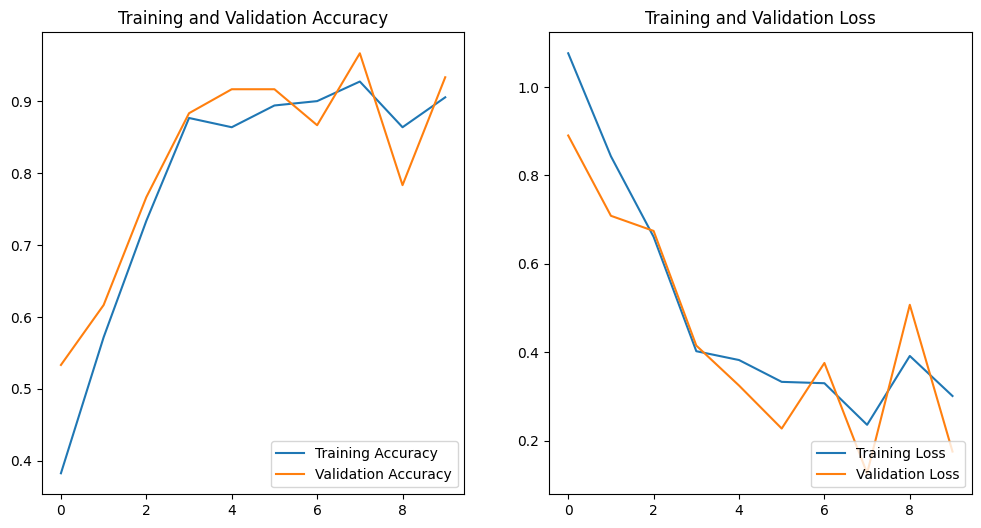

In [82]:
EPOCHS=10
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

## Image Predictions on Test Data

In [83]:
def Prediction(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array((images[i].numpy()))
    img_array = tf.expand_dims(img_array,0)     # create a batch

    predictions = model.predict(img_array)

    predicted_class = class_labels[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)

    return predicted_class , confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


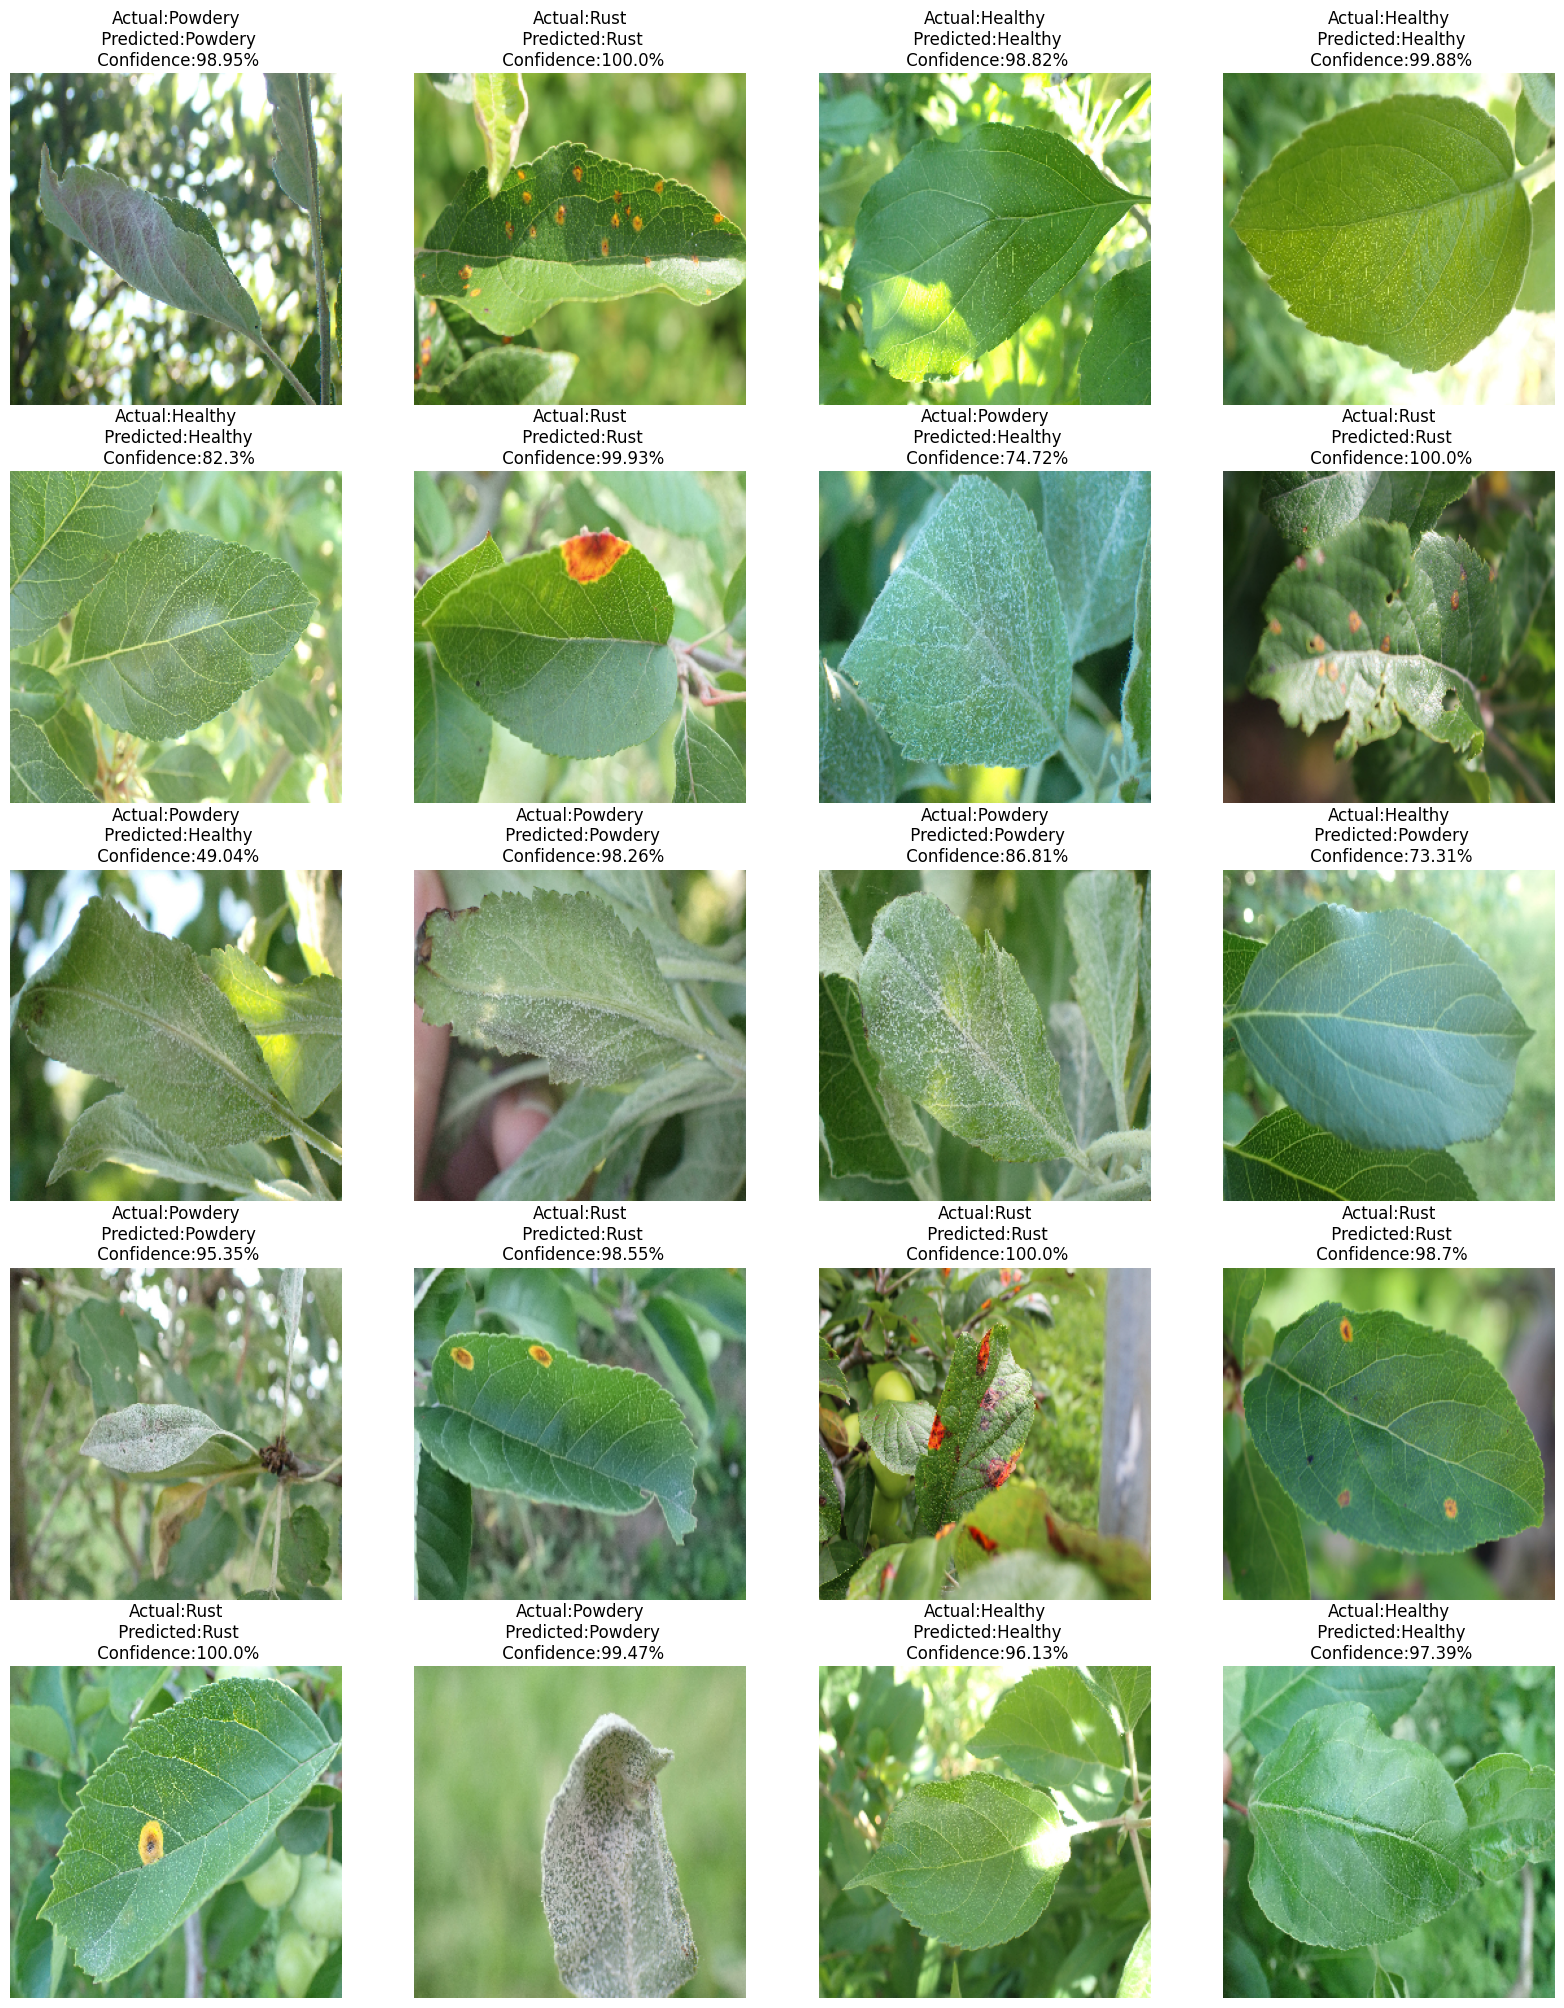

In [84]:
plt.figure(figsize=(20,25))
for images , labels in test.take(1):
    for i in range(20):
        ax = plt.subplot(5,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(class_labels[labels[i]])


        predicted_class , confidence = Prediction(model,images[i].numpy())
        actual_class = class_labels[labels[i]]
        plt.title(f"Actual:{actual_class}\n Predicted:{predicted_class}\n Confidence:{confidence}%")
        plt.axis("off")